In [2]:
import os
os.environ["OMP_NUM_THREADS"]='1'
import matplotlib.pyplot as plt
import numpy as np
import pendula
import timeit
from shutil import rmtree
from IPython.display import Video
import pysindy as ps

plt.rcParams.update({'font.size': 12, 'pdf.fonttype':42,'text.usetex': False, 'font.family': 'serif'})

def spring(p0,p1,div,height):
    l=np.linalg.norm(p1-p0)
    xhat=(p1-p0)/l
    yhat=np.array([xhat[1],-xhat[0]])
    return np.concatenate([[p0,p0+l/div*xhat],[p0+i*l/div*xhat+height*yhat*(-1)**i for i in range(2,div-1)],[p1-l/div*xhat,p1]])

colors = [
    "#ff7f0e",
    "#2ca02c",
    "#1f77b4",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

### Plot run from file

In [ ]:
1008 1010 1018 1004 1031 1048  102 1003 1014 1043 1002 1016 1092 1472 1001 1000 1007 1360 1107

In [ ]:
121 1004 1009 1002 1012 1005 1039 1006 1014 1031 1007 1021 1068 1000 101 1003 1224 1043 1001 

32 0.055 3.5 5000.0


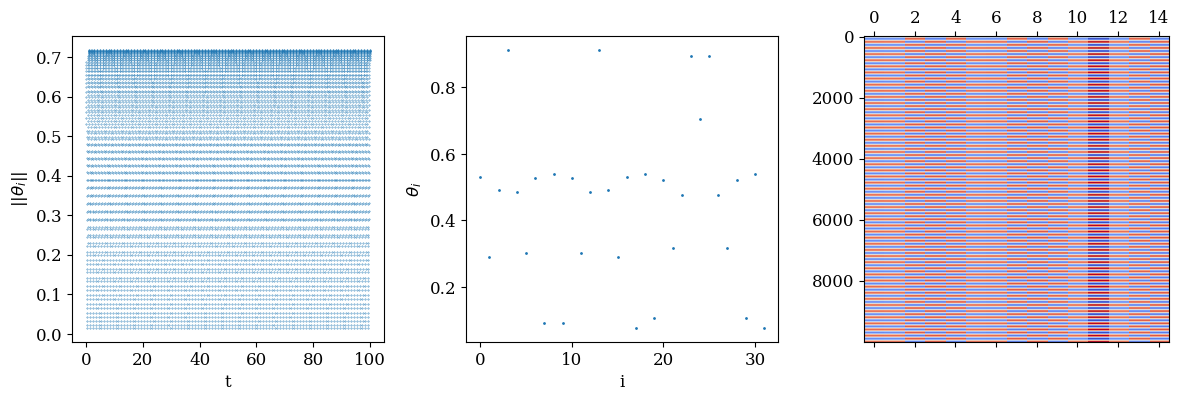

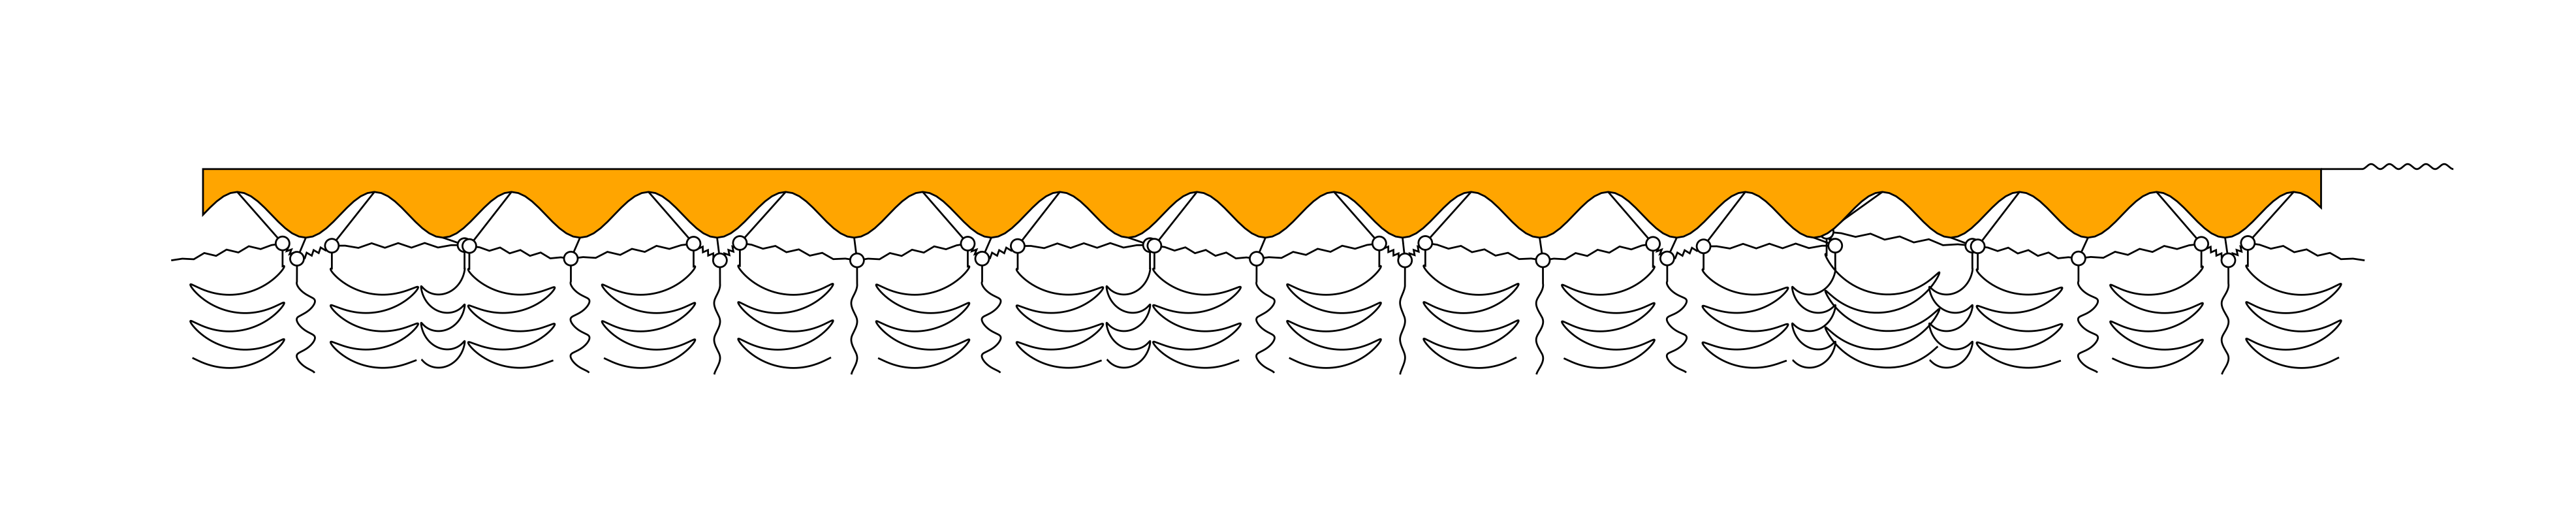

In [3]:
filebase='data/randompendula/1014'

file=open(filebase+'out.dat')
N,tmax,t1,dt,amp,omega=np.array(file.readlines()[1].split(),dtype=np.float64)
N=int(N)
print(N,amp,omega,tmax)
ys=np.load(filebase+'dat.npy')
ys=ys[:,:N]

fig,ax=plt.subplots(1,3,figsize=(12,4))
ax[0].scatter(x=dt*np.arange(len(ys)),y=np.linalg.norm(ys[:,:N],axis=1)/N**0.5,s=0.1)
ax[0].set_xlabel('t')
ax[0].set_ylabel(r'$|| \theta_i ||$')

ax[1].scatter(x=np.arange(N),y=np.linalg.norm(ys[:,:N],axis=0)/len(ys)**0.5,s=1)
ax[1].set_xlabel('i')
ax[1].set_ylabel(r'$\theta_i$')

dat=ys[::1,2:N:2]
ratio=len(dat[0])/len(dat)
ax[2].matshow(dat,aspect=ratio,cmap='coolwarm',vmin=np.min(dat),vmax=np.max(dat))

plt.tight_layout()
plt.show()

n0=0
n1=31

m=len(ys)-1
dm=500

z0=-amp*np.cos(2*np.pi*dt*m)

fig=plt.figure(figsize=((n1-n0)*10,10))
lengths=1+0.5*(-1)**np.arange(N)
f=(lambda x: 1-0.5*np.cos(np.pi*x/dx))
dx=1.5

background=plt.Polygon([[dx*(n0-n0)-1,-5],[dx*(n1-n0)+3,-5],[dx*(n1-n0)+3,5],[dx*(n0-n0)-1,5]],closed=True,facecolor='white')
plt.gca().add_patch(background)

n=np.mod(n0-2,N)+1
p0=np.array([dx*(0)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
p1=np.array([dx*(1)-lengths[n0]*np.sin(ys[m,n0]), z0+lengths[n0]-lengths[n0]*np.cos(ys[m,n0])])
line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
plt.gca().add_patch(line0)
for n in range(n0,n1-1):
    p0=np.array([dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
    p1=np.array([dx*(n+1-n0+1)-lengths[n+1]*np.sin(ys[m,n+1]), z0+lengths[n+1]-lengths[n+1]*np.cos(ys[m,n+1])])
    line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line0)
n=np.mod(n1-1,N)+1
p0=np.array([dx*(n1-n0)-lengths[n1-1]*np.sin(ys[m,n1-1]), z0+lengths[n1-1]-lengths[n1-1]*np.cos(ys[m,n1-1])])
p1=np.array([dx*(n1-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
plt.gca().add_patch(line0)



for n in range(n0,n1):
    circle = plt.Circle((dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])), radius=0.15, facecolor='white',edgecolor='black',lw=2)
    line = plt.Polygon([(dx*(n-n0+1), z0+lengths[n]),(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],fill=None,closed=None,edgecolor='black', lw=2)
    line2 = plt.Polygon(np.concatenate([[(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],np.transpose([dx*(n-n0+1)-lengths[n]*np.sin(ys[m:m-dm:-1,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m:m-dm:-1,n])-0.5-2/dm*np.arange(dm)])]),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line)
    plt.gca().add_patch(line2)
    plt.gca().add_patch(circle)

ceiling=plt.Polygon(np.concatenate([[[dx/2, 2+z0]],[[x, z0+f(x)] for x in np.arange(dx/2,(n1-n0)*dx+dx/2,dx/10)],[[(n1-n0)*dx+dx/2-dx/10, 2+z0]]]),closed=True,facecolor='orange',edgecolor='black',lw=2)
plt.gca().add_patch(ceiling)
line3=plt.Polygon(np.concatenate([[[(n1-n0)*dx+dx/2-dx/10,2+z0]],np.transpose([(n1-n0)*dx+dx+2/dm*np.arange(dm),2-amp*np.cos(2*np.pi*dt*(m-np.arange(dm)))])]),fill=None,closed=None,edgecolor='black', lw=2)
plt.gca().add_patch(line3)

plt.axis('scaled')
plt.axis('off')

plt.show()

In [106]:
delta=0.35
omega=3.5
phases=ys[:201]
X=np.cos(2*np.pi/100*(np.arange(201))).reshape(201,1)
Y=np.sin(2*np.pi/100*(np.arange(201))).reshape(201,1)
t=(np.arange(201)/200*4*np.pi).reshape(201,1)
x=np.cos(phases[:,::2])
y=np.sin(phases[:,::2])
p=omega*(1+delta)*ps.FiniteDifference(axis=0)._differentiate(phases,t=2*np.pi*dt)[:201,::2]

u=np.cos(phases[:,1::2])
v=np.sin(phases[:,1::2])
q=omega*(1-delta)*ps.FiniteDifference(axis=0)._differentiate(phases,t=2*np.pi*dt)[:201,1::2]
cycle=np.concatenate([t,x,y,p,u,v,q,X,Y],axis=1)
np.savetxt('data/pendula/cycle.dat',cycle)

### Cluster features in batch  

19


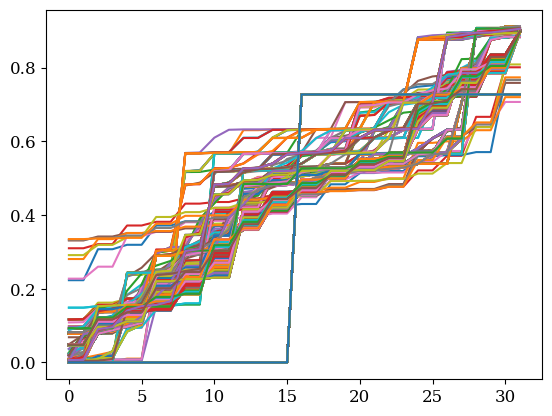

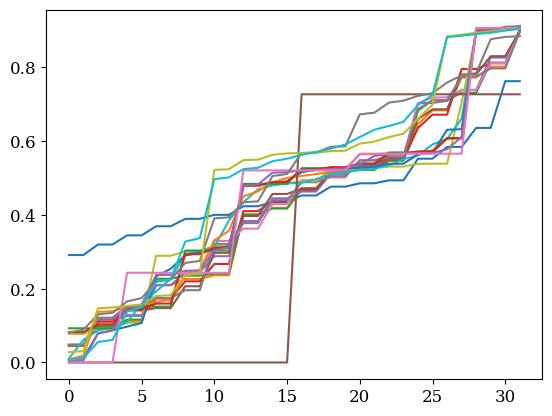

[ 121 1004 1009 1002 1012 1005 1039 1006 1014 1031 1007 1021 1068 1000
  101 1003 1224 1043 1001]
[  8  96  89 105  73 147  97  90  47  60 169  26   5  91 102 227  11  34
  22 117]


In [60]:
from scipy.cluster import vq
os.system("awk '{if(FNR==3){print $0}}' data/randompendula/*out.dat > data/randompendula/orders.dat")
vals=np.loadtxt('data/randompendula/orders.dat')

num=20
clusters=vq.kmeans(vals[:,1:],num)[0]
clusters=clusters[np.argsort(np.linalg.norm(clusters,axis=1))]
ids=vq.vq(vals[:,1:],clusters)[0]
print(np.max(ids))

for i in range(len(vals)):
    plt.plot(vals[i,1:])
plt.show()

plt.plot(np.transpose(clusters))
plt.show()

chimeras=np.array([vals[np.where(ids==i)[0][0],0] for i in range(np.max(ids))],dtype=int)
print(chimeras)
print(np.unique(ids,return_counts=True)[1])

In [61]:
seeds=''
for i in range(len(chimeras)):
    seed=chimeras[i]
    seeds=seeds+str(seed)+' '
print(seeds)
os.system('./sweeppendula2.sh %s'%(seeds))

121 1004 1009 1002 1012 1005 1039 1006 1014 1031 1007 1021 1068 1000 101 1003 1224 1043 1001 
121
1004
1009
1002
1012
1005
1039
1006
1014
1031
1007
1021
1068
1000
101
1003
using random initial conditions
using random initial conditions
using random initial conditions
using random initial conditions
using random initial conditions
using random initial conditions
using random initial conditions
using random initial conditions
using random initial conditions
using random initial conditions
using random initial conditions
using random initial conditions
using random initial conditions
using random initial conditions
using random initial conditions
using random initial conditions
runtime: 122.230823 1004 2.796037
1224
runtime: 125.074254 1000 2.905124
using random initial conditions
runtime: 126.838190 1003 2.908187
1043
using random initial conditions
1001
using random initial conditions
runtime: 129.351115 121 2.757904
runtime: 130.298245 1006 2.841316
runtime: 132.805619 1012 2.833015
ru

0

In [65]:
for i in range(len(chimeras)):
    ys=np.load('data/randompendula/%idat.npy'%(chimeras[i]))
    delta=0.15
    omega=3.5
    phases=ys[:201,:N]
    X=np.cos(2*np.pi/100*(np.arange(201))).reshape(201,1)
    Y=np.sin(2*np.pi/100*(np.arange(201))).reshape(201,1)
    t=(np.arange(201)/200*4*np.pi).reshape(201,1)
    x=np.cos(phases[:,::2])
    y=np.sin(phases[:,::2])
    p=omega*(1+delta)*ps.FiniteDifference(axis=0)._differentiate(phases,t=2*np.pi*dt)[:201,::2]

    u=np.cos(phases[:,1::2])
    v=np.sin(phases[:,1::2])
    q=omega*(1-delta)*ps.FiniteDifference(axis=0)._differentiate(phases,t=2*np.pi*dt)[:201,1::2]
    cycle=np.concatenate([t,x,y,p,u,v,q,X,Y],axis=1)
    if not os.path.exists('data/pendula/%i'%(i)):
        os.mkdir('data/pendula/%i'%(i))
    np.savetxt('data/pendula/%i/cycle.dat'%(i),cycle)

### Animation

In [93]:
filebase='data/randompendula/1008'

file=open(filebase+'out.dat')
N,tmax,t1,dt,amp,omega=np.array(file.readlines()[1].split(),dtype=np.float64)
N=int(N)
ys=np.load(filebase+'dat.npy')
ys=ys[:,:N]

n0=0
n1=31

dm=500
m0=len(ys)-1000+dm
m1=len(ys)

if os.path.isdir(filebase+'animation'):
    rmtree(filebase+'animation')
if not os.path.isdir(filebase+'animation'):
    os.mkdir(filebase+'animation')

for m in range(m0,m1):
    print(m,end='\t\r')
    z0=-amp*np.cos(2*np.pi*dt*m)
    fig=plt.figure(figsize=((n1-n0)*10,10))
    lengths=1+0.5*(-1)**np.arange(N)
    f=(lambda x: 1-0.5*np.cos(np.pi*x/dx))
    dx=1.5
    
    background=plt.Polygon([[dx*(n0-n0)-1,-5],[dx*(n1-n0)+5,-5],[dx*(n1-n0)+5,5],[dx*(n0-n0)-1,5]],closed=True,facecolor='white')
    plt.gca().add_patch(background)
    
    ceiling=plt.Polygon(np.concatenate([[[dx/2, 2+z0]],[[x, z0+f(x)] for x in np.arange(dx/2,(n1-n0)*dx+dx/2,dx/10)],[[(n1-n0)*dx+dx/2-dx/10, 2+z0]]]),closed=True,facecolor='orange',edgecolor='black',lw=2)
    plt.gca().add_patch(ceiling)

    n=np.mod(n0-2,N)+1
    p0=np.array([dx*(0)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
    p1=np.array([dx*(1)-lengths[n0]*np.sin(ys[m,n0]), z0+lengths[n0]-lengths[n0]*np.cos(ys[m,n0])])
    line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line0)
    for n in range(n0,n1-1):
        p0=np.array([dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
        p1=np.array([dx*(n+1-n0+1)-lengths[n+1]*np.sin(ys[m,n+1]), z0+lengths[n+1]-lengths[n+1]*np.cos(ys[m,n+1])])
        line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
        plt.gca().add_patch(line0)
    n=np.mod(n1-1,N)+1
    p0=np.array([dx*(n1-n0)-lengths[n1-1]*np.sin(ys[m,n1-1]), z0+lengths[n1-1]-lengths[n1-1]*np.cos(ys[m,n1-1])])
    p1=np.array([dx*(n1-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
    line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line0)

        
    for n in range(n0,n1):
        circle = plt.Circle((dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])), radius=0.15, facecolor='white',edgecolor='black',lw=2)
        line = plt.Polygon([(dx*(n-n0+1), z0+lengths[n]),(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],fill=None,closed=None,edgecolor='black', lw=2)
        line2 = plt.Polygon(np.concatenate([[(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],np.transpose([dx*(n-n0+1)-lengths[n]*np.sin(ys[m:m-dm:-1,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m:m-dm:-1,n])-0.5-2/dm*np.arange(dm)])]),fill=None,closed=None,edgecolor='black', lw=2)
        plt.gca().add_patch(line)
        plt.gca().add_patch(line2)
        plt.gca().add_patch(circle)

    line3=plt.Polygon(np.concatenate([[[(n1-n0)*dx+dx/2-dx/10,2+z0]],np.transpose([(n1-n0)*dx+dx+2/dm*np.arange(dm),2-amp*np.cos(2*np.pi*dt*(m-np.arange(dm)))])]),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line3)

    plt.axis('scaled')
    plt.axis('off')
    
    fig.savefig(filebase+'animation/'+str(m-m0).zfill(4)+'.png', dpi=100,bbox_inches='tight')
    plt.close('all')

os.system('encode.sh ' + filebase+'animation/' + ' ' + filebase + 'animation 60 ')
if os.path.isdir(filebase+'animation'):
    rmtree(filebase+'animation')
Video(filebase+'animation.mp4',width=1024)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


0 6


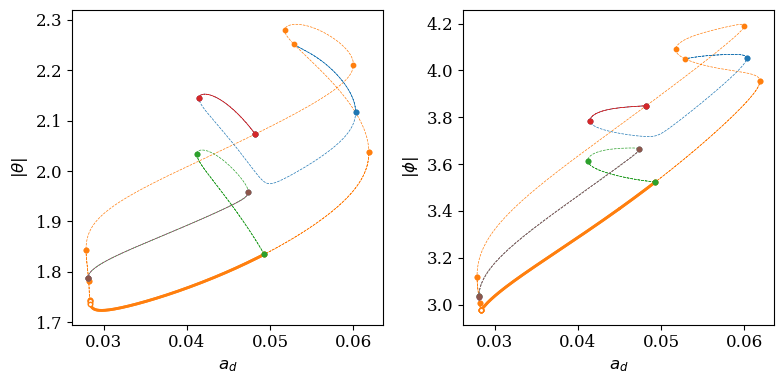

1 5


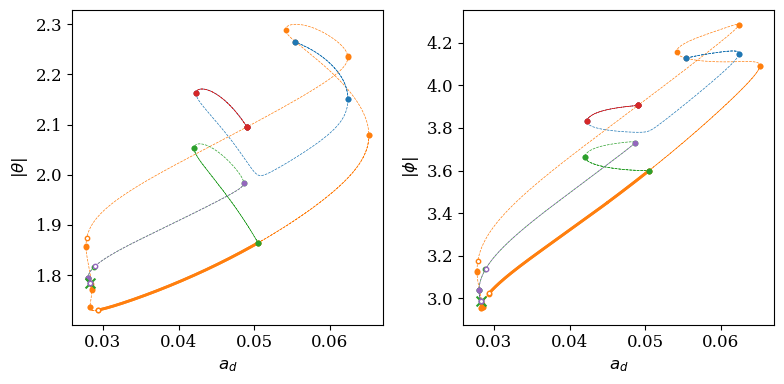

2 10


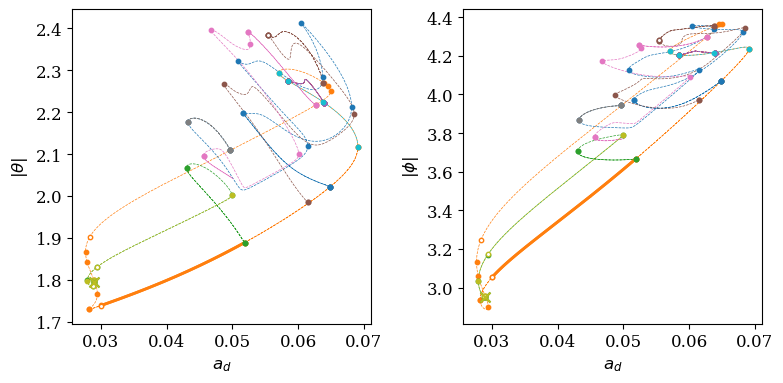

3 12


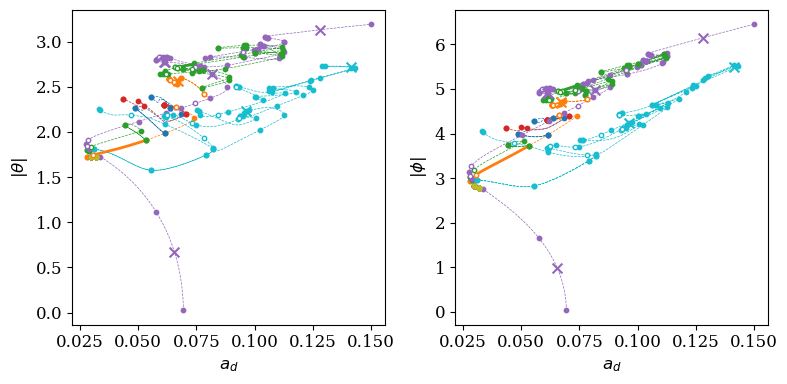

4 10


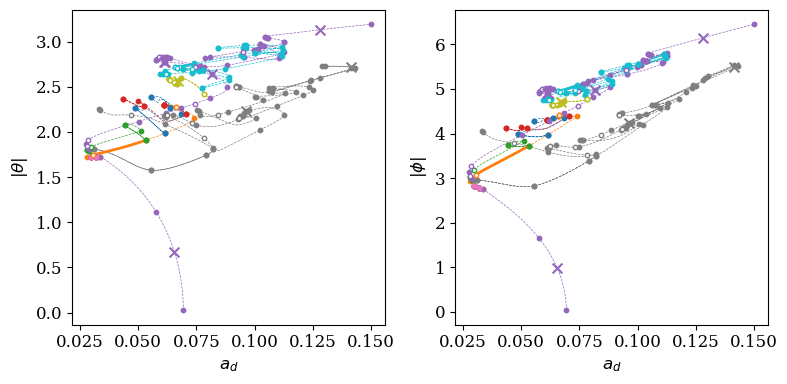

5 16


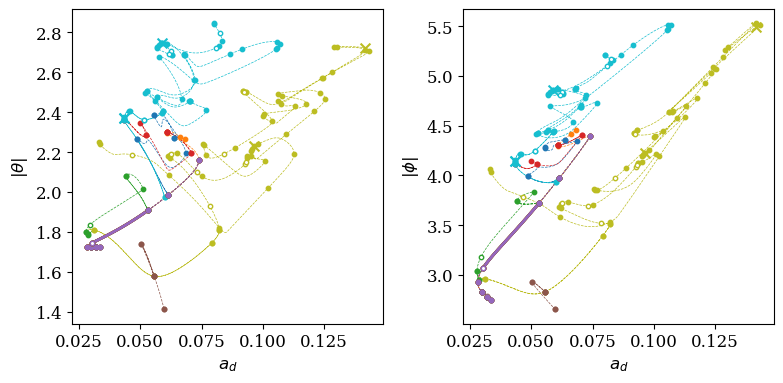

6 20


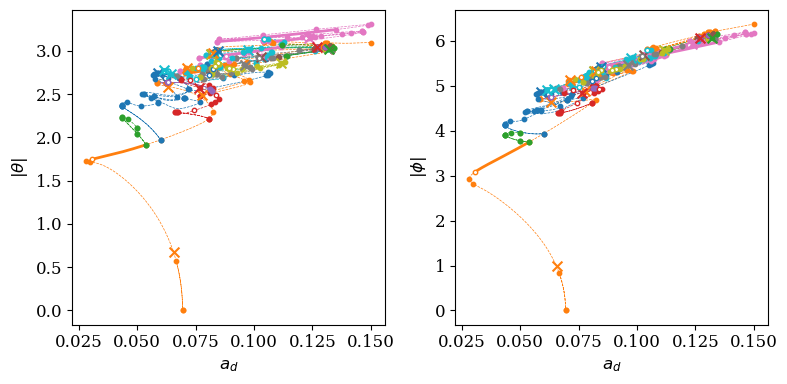

7 20


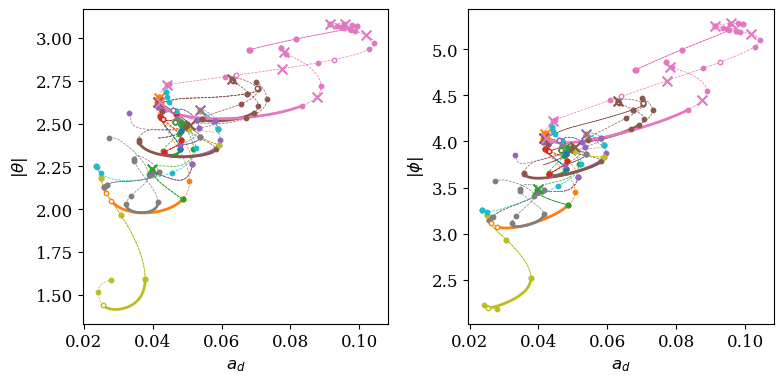

8 1


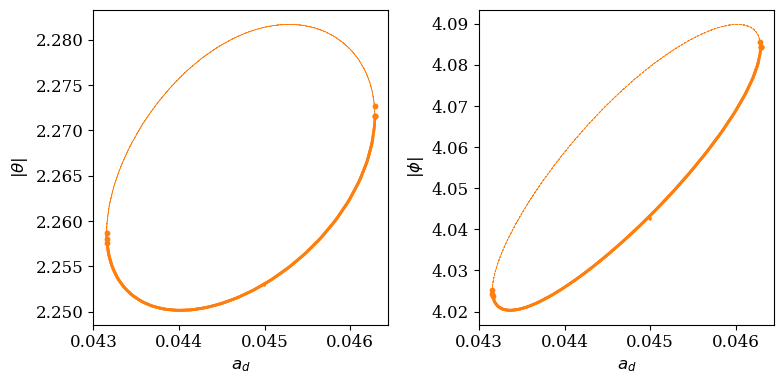

9 1


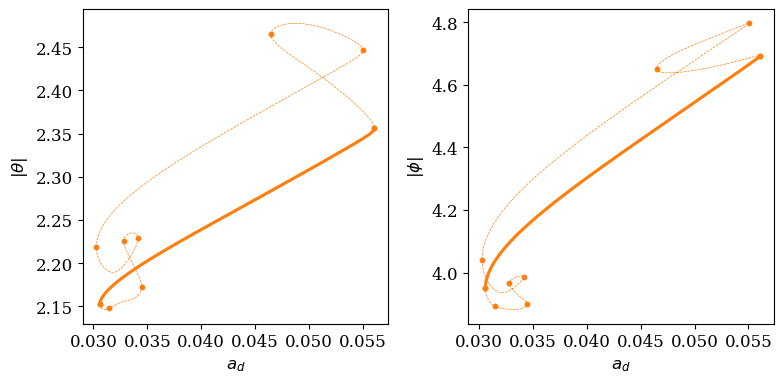

10 20


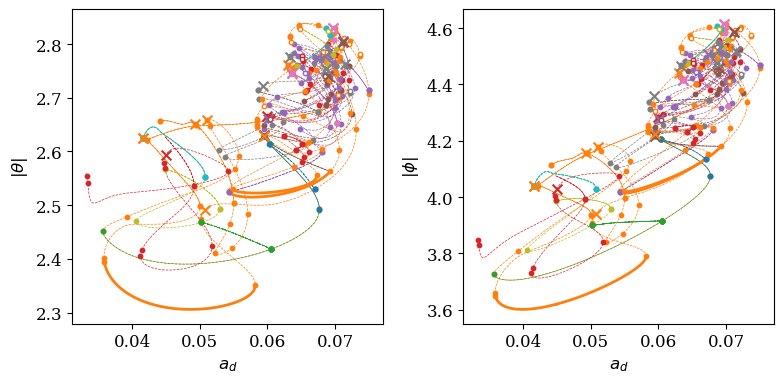

11 19


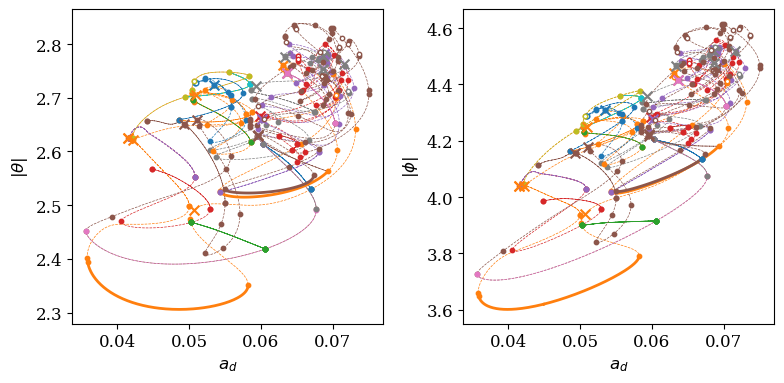

12 19


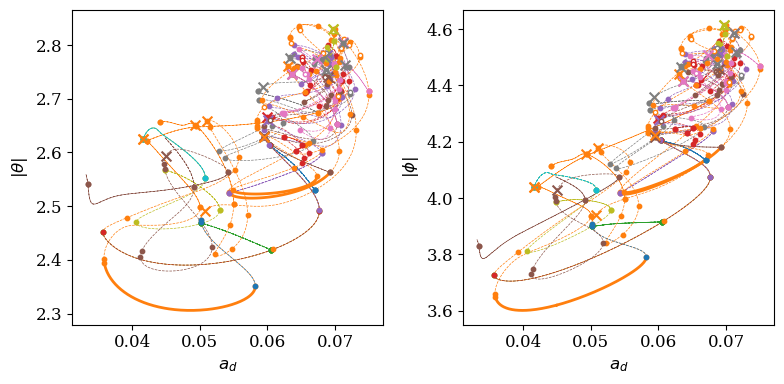

13 19


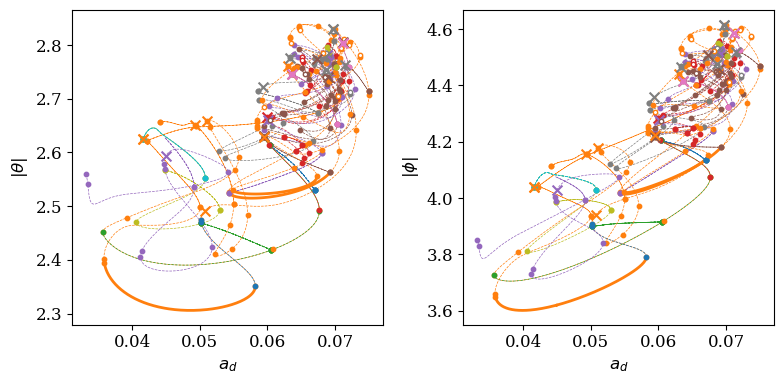

14 20


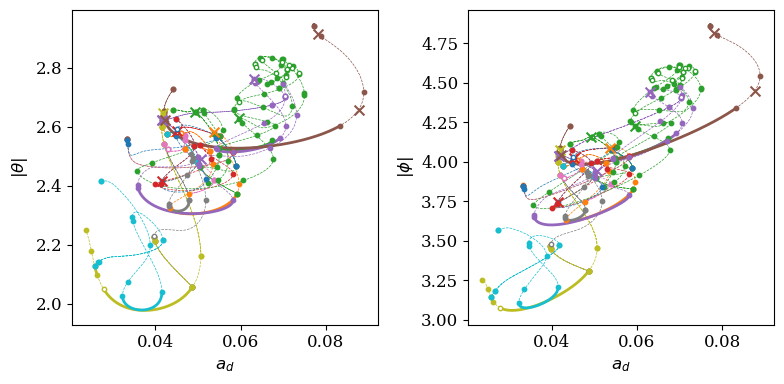

15 1


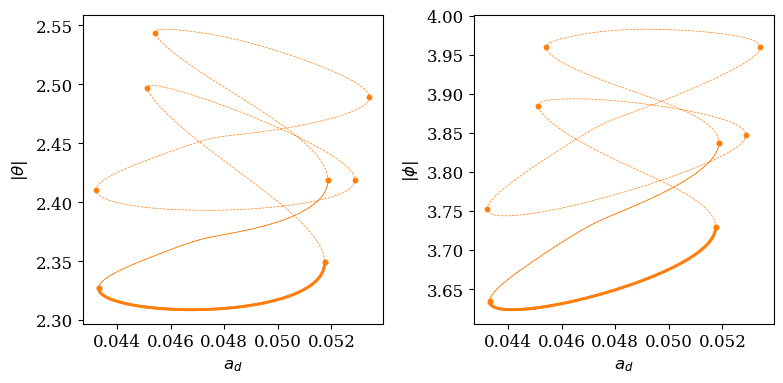

16 20


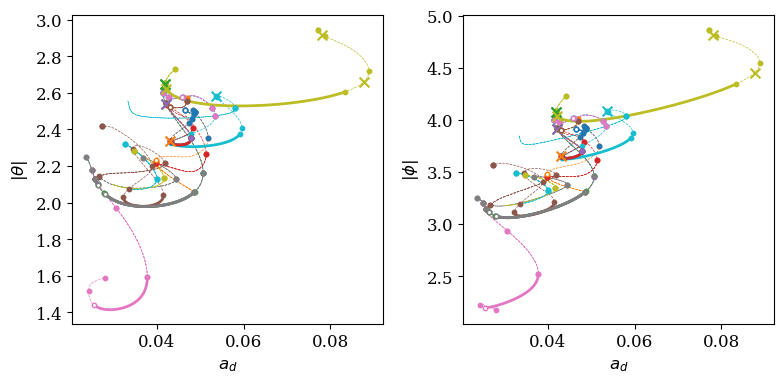

17 20


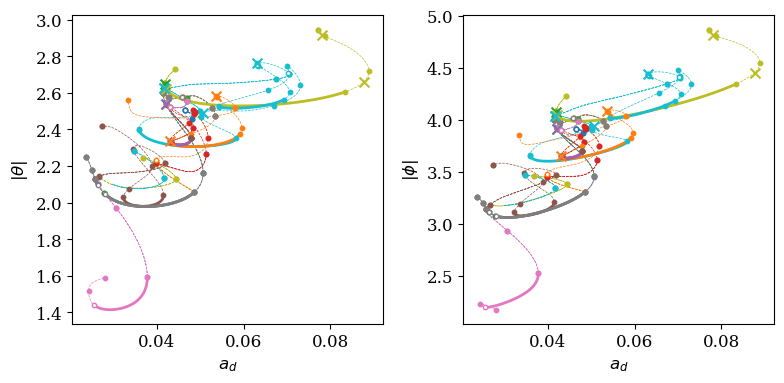

18 1


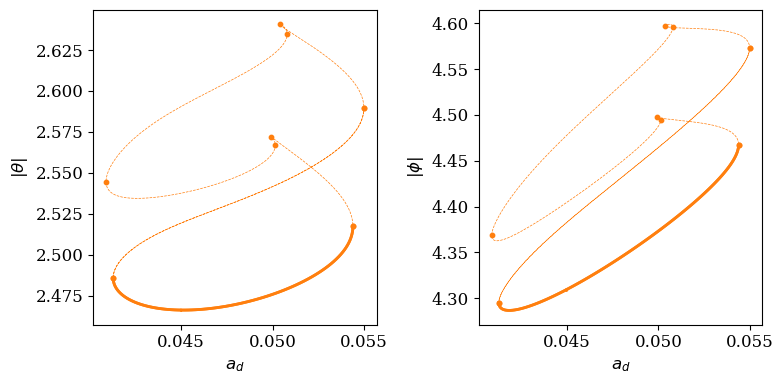

19 1
index 139 is out of bounds for axis 0 with size 139
20 1


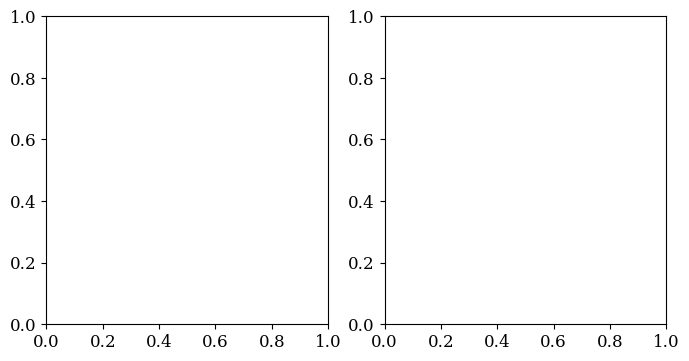

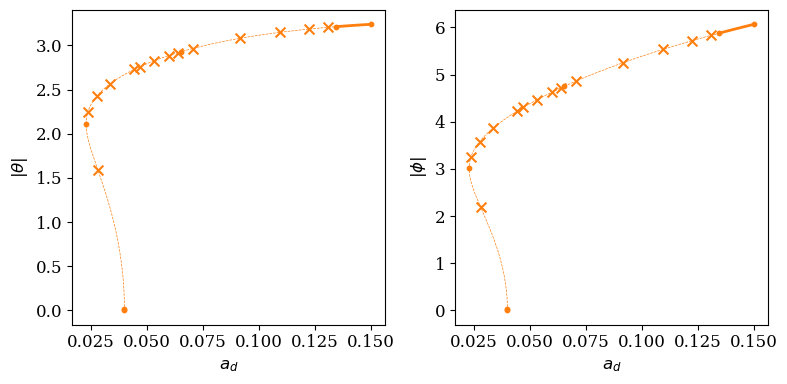

21 1


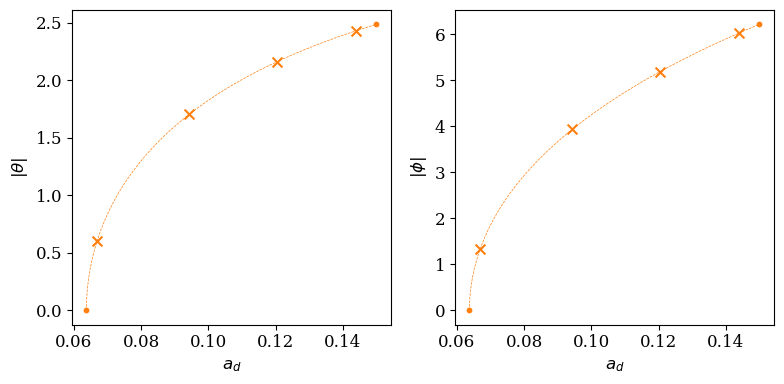

22 1


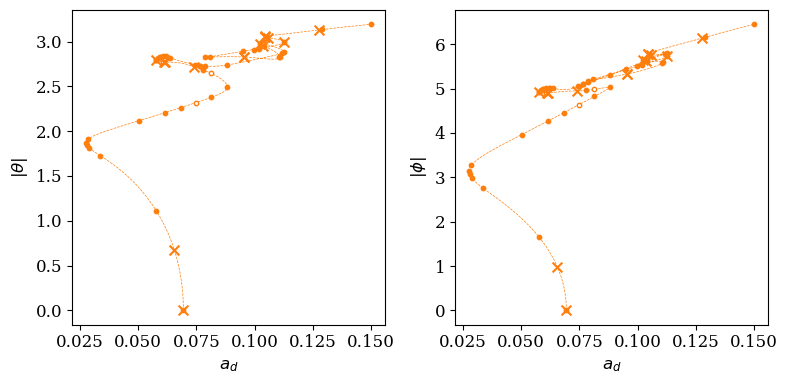

23 1


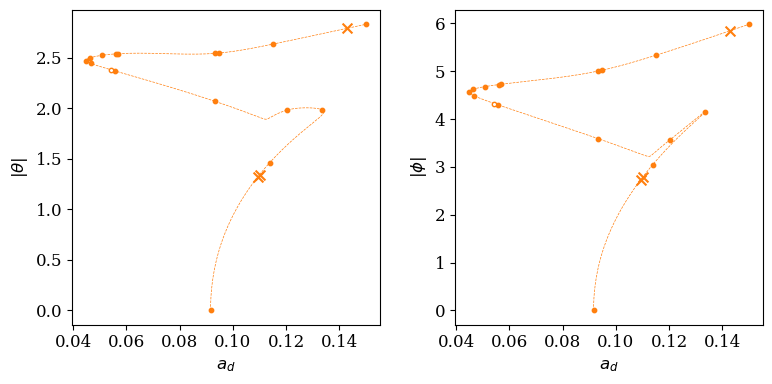

24 1


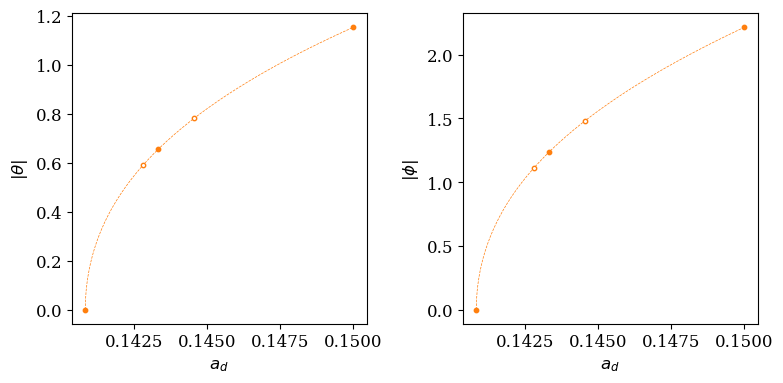

In [3]:
N=16
filebase='data/pendula2/'
num_chimeras=np.count_nonzero([st.isdigit() for st in os.listdir(filebase)])

for i in range(num_chimeras):
    
    try:
        numbr=int(os.popen('ls %s%i/total*.dat | wc -l 2> /dev/null' %(filebase,i),'r',1).readline())
        if numbr==0:
            raise Exception('fail')
        print(i,numbr)
        plt.subplots(1,2,figsize=(8,4))
        
        for k in range(numbr):
            br=np.loadtxt('%s%i/total%i.dat'%(filebase,i,k+1))[:]
            if len(br)>5:
                stableinds=np.array(np.where(br[:,11]==6*N+2)[0])
                stablebranches=[]
                jumps=np.where(np.diff(stableinds)>2)[0]
                cuts=np.zeros(2+2*len(jumps),dtype=int)
                cuts[0]=0
                cuts[-1]=-1
                cuts[1:-1:2]=jumps
                cuts[2:-1:2]=jumps+1
                for j in range(0,len(cuts),2):
                    stablebranches=stablebranches+[stableinds[cuts[j]:cuts[j+1]]]

                jumps=1+np.array(np.where(np.diff(br[:,-1])!=0)[0])
                jumps=jumps[jumps+1<len(br)]
                jumps=jumps[jumps-1<len(br)]
                bpinds=np.array(np.where(np.sign(br[jumps+1,6]**2+br[jumps+1,7]**2-1)/np.sign(br[jumps-1,6]**2+br[jumps-1,7]**2-1)>0)[0],dtype=int)
                bps=br[np.concatenate([[0,-1],jumps[bpinds]])]
                sbpsinds=np.array(np.where(np.sign(br[jumps+1,6]-1)/np.sign(br[jumps-1,6]-1)<0)[0],dtype=int)
                sbpsinds=sbpsinds[np.intersect1d(np.intersect1d(np.where(np.abs(br[jumps[sbpsinds],6]-1)<1e-1)[0],np.where(np.abs(br[jumps[sbpsinds]+1,6]-1)<1e-1)[0]),np.where(np.abs(br[jumps[sbpsinds]-1,6]-1)<1e-1)[0])]
                trinds=np.array(np.where(np.sign(br[jumps+1,6]**2+br[jumps+1,7]**2-1)/np.sign(br[jumps-1,6]**2+br[jumps-1,7]**2-1)<0)[0],dtype=int)
                trinds=trinds[np.intersect1d(np.intersect1d(np.where(np.abs(br[jumps[trinds],6]**2+br[jumps[trinds],7]**2-1)<1e-1)[0],np.where(np.abs(br[jumps[trinds]+1,6]**2+br[jumps[trinds]+1,7]**2-1)<1e-1)[0]),np.where(np.abs(br[jumps[trinds]-1,6]**2+br[jumps[trinds]-1,7]**2-1)<1e-1)[0])]
                trinds=np.setdiff1d(trinds,sbpsinds)
                sbps=br[jumps[sbpsinds]]
                trs=br[jumps[trinds]]            

                plt.subplot(1,2,1)
                plt.plot(br[:,0],br[:,3],ls='--',c=colors[(k)%len(colors)],lw=0.5,label=k,zorder=1)
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,3],c=colors[(k)%len(colors)],lw=2,zorder=3)
                for bp in bps:
                    plt.scatter(bp[0],bp[3],edgecolor=colors[(k)%len(colors)],facecolor=colors[(k)%len(colors)],marker='o',s=10,zorder=4)
                for tr in trs:
                    plt.scatter(tr[0],tr[3],edgecolor=colors[(k)%len(colors)],facecolor='white',marker='o',s=10,zorder=5)
                for sbp in sbps:
                    plt.scatter(sbp[0],sbp[3],c=colors[(k)%len(colors)],marker='x',s=50,zorder=5)

                plt.ylabel(r'$|\theta|$')
                plt.xlabel(r'$a_d$')

                plt.subplot(1,2,2)
                plt.plot(br[:,0],br[:,4],ls='--',c=colors[(k)%len(colors)],lw=0.5,label=k,zorder=1)
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,4],c=colors[(k)%len(colors)],lw=2,zorder=3)
                for bp in bps:
                    plt.scatter(bp[0],bp[4],edgecolor=colors[(k)%len(colors)],facecolor=colors[(k)%len(colors)],marker='o',s=10,zorder=4)
                for tr in trs:
                    plt.scatter(tr[0],tr[4],edgecolor=colors[(k)%len(colors)],facecolor='white',marker='o',s=10,zorder=5)
                for sbp in sbps:
                    plt.scatter(sbp[0],sbp[4],c=colors[(k)%len(colors)],marker='x',s=50,zorder=5)

                plt.ylabel(r'$|\phi|$')
                plt.xlabel(r'$a_d$')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(e)
        pass

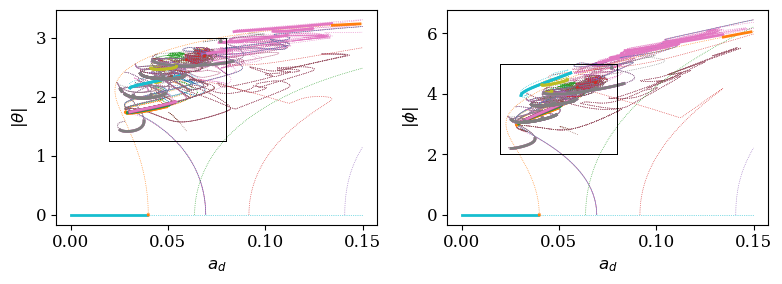

In [31]:
N=16
filebase='data/pendula2/'
num_chimeras=np.count_nonzero([st.isdigit() for st in os.listdir(filebase)])
plt.subplots(1,2,figsize=(8,3))

for i in range(num_chimeras):
    
    try:
        numbr=int(os.popen('ls %s%i/total*.dat | wc -l 2> /dev/null' %(filebase,i),'r',1).readline())
        if numbr==0:
            raise Exception()

        for k in range(numbr):
            br=np.loadtxt('%s%i/total%i.dat'%(filebase,i,k+1))[:]
            if len(br)>5:
                stableinds=np.array(np.where(br[:,11]==6*N+2)[0])
                stablebranches=[]
                jumps=np.where(np.diff(stableinds)>2)[0]
                cuts=np.zeros(2+2*len(jumps),dtype=int)
                cuts[0]=0
                cuts[-1]=-1
                cuts[1:-1:2]=jumps
                cuts[2:-1:2]=jumps+1
                for j in range(0,len(cuts),2):
                    stablebranches=stablebranches+[stableinds[cuts[j]:cuts[j+1]]]

                plt.subplot(1,2,1)
                plt.plot(br[:,0],br[:,3],ls=':',c=colors[(i)%len(colors)],lw=0.5,label=k,zorder=1)
                plt.plot([xlims1[0],xlims1[1],xlims1[1],xlims1[0],xlims1[0]],[ylims1[0],ylims1[0],ylims1[1],ylims1[1],ylims1[0]],c='black',lw=0.5,zorder=6)
                
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,3],c=colors[(i)%len(colors)],lw=2,zorder=3)

                plt.ylabel(r'$|\theta|$')
                plt.xlabel(r'$a_d$')

                plt.subplot(1,2,2)
                plt.plot(br[:,0],br[:,4],ls=':',c=colors[(i)%len(colors)],lw=0.5,label=k,zorder=1)
                plt.plot([xlims1[0],xlims1[1],xlims1[1],xlims1[0],xlims1[0]],[ylims2[0],ylims2[0],ylims2[1],ylims2[1],ylims2[0]],c='black',lw=0.5,zorder=6)

                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,4],c=colors[(i)%len(colors)],lw=2,zorder=3)

                plt.ylabel(r'$|\phi|$')
                plt.xlabel(r'$a_d$')


    except Exception as e:
        print(e)
        pass
    
plt.tight_layout()
plt.savefig(filebase+'penduladiagram.pdf')
plt.show()


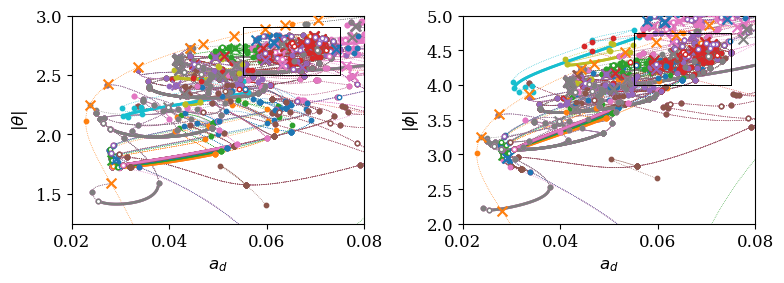

In [30]:
N=16
filebase='data/pendula2/'
num_chimeras=np.count_nonzero([st.isdigit() for st in os.listdir(filebase)])
plt.subplots(1,2,figsize=(8,3))

for i in range(num_chimeras):
    try:
        numbr=int(os.popen('ls %s%i/total*.dat | wc -l 2> /dev/null' %(filebase,i),'r',1).readline())
        if numbr==0:
            raise Exception()

        for k in range(numbr):
            br=np.loadtxt('%s%i/total%i.dat'%(filebase,i,k+1))[:]
            if len(br)>5:
                stableinds=np.array(np.where(br[:,11]==6*N+2)[0])
                stablebranches=[]
                jumps=np.where(np.diff(stableinds)>2)[0]
                cuts=np.zeros(2+2*len(jumps),dtype=int)
                cuts[0]=0
                cuts[-1]=-1
                cuts[1:-1:2]=jumps
                cuts[2:-1:2]=jumps+1
                for j in range(0,len(cuts),2):
                    stablebranches=stablebranches+[stableinds[cuts[j]:cuts[j+1]]]

                jumps=1+np.array(np.where(np.diff(br[:,-1])!=0)[0])
                jumps=jumps[jumps+1<len(br)]
                jumps=jumps[jumps-1<len(br)]
                bpinds=np.array(np.where(np.sign(br[jumps+1,6]**2+br[jumps+1,7]**2-1)/np.sign(br[jumps-1,6]**2+br[jumps-1,7]**2-1)>0)[0],dtype=int)
                sbpsinds=np.array(np.where(np.sign(br[jumps+1,6]-1)/np.sign(br[jumps-1,6]-1)<0)[0],dtype=int)
                sbpsinds=sbpsinds[np.intersect1d(np.intersect1d(np.where(np.abs(br[jumps[sbpsinds],6]-1)<1e-1)[0],np.where(np.abs(br[jumps[sbpsinds]+1,6]-1)<1e-1)[0]),np.where(np.abs(br[jumps[sbpsinds]-1,6]-1)<1e-1)[0])]
                trinds=np.array(np.where(np.sign(br[jumps+1,6]**2+br[jumps+1,7]**2-1)/np.sign(br[jumps-1,6]**2+br[jumps-1,7]**2-1)<0)[0],dtype=int)
                trinds=trinds[np.intersect1d(np.intersect1d(np.where(np.abs(br[jumps[trinds],6]**2+br[jumps[trinds],7]**2-1)<1e-1)[0],np.where(np.abs(br[jumps[trinds]+1,6]**2+br[jumps[trinds]+1,7]**2-1)<1e-1)[0]),np.where(np.abs(br[jumps[trinds]-1,6]**2+br[jumps[trinds]-1,7]**2-1)<1e-1)[0])]
                trinds=np.setdiff1d(trinds,sbpsinds)
                bpinds=np.setdiff1d(bpinds,sbpsinds)
                bps=br[jumps[bpinds]]
                sbps=br[jumps[sbpsinds]]
                trs=br[jumps[trinds]]            

                plt.subplot(1,2,1)
                plt.plot(br[:,0],br[:,3],ls=':',c=colors[(i)%len(colors)],lw=0.5,label=k,zorder=1)
                plt.plot([xlims2[0],xlims2[1],xlims2[1],xlims2[0],xlims2[0]],[ylims3[0],ylims3[0],ylims3[1],ylims3[1],ylims3[0]],c='black',lw=0.5,zorder=6)
                
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,3],c=colors[(i)%len(colors)],lw=2,zorder=3)
                for bp in bps:
                    plt.scatter(bp[0],bp[3],edgecolor=colors[(i)%len(colors)],facecolor=colors[(i)%len(colors)],marker='o',s=10,zorder=4)
                for tr in trs:
                    plt.scatter(tr[0],tr[3],edgecolor=colors[(i)%len(colors)],facecolor='white',marker='o',s=10,zorder=5)
                for sbp in sbps:
                    plt.scatter(sbp[0],sbp[3],c=colors[(i)%len(colors)],marker='x',s=50,zorder=5)
                    
                plt.ylabel(r'$|\theta|$')
                plt.xlabel(r'$a_d$')
                plt.ylim(ylims1)
                plt.xlim(xlims1)

                plt.subplot(1,2,2)
                plt.plot(br[:,0],br[:,4],ls=':',c=colors[(i)%len(colors)],lw=0.5,label=k,zorder=1)
                plt.plot([xlims2[0],xlims2[1],xlims2[1],xlims2[0],xlims2[0]],[ylims4[0],ylims4[0],ylims4[1],ylims4[1],ylims4[0]],c='black',lw=0.5,zorder=6)
                
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,4],c=colors[(i)%len(colors)],lw=2,zorder=3)
                for bp in bps:
                    plt.scatter(bp[0],bp[4],edgecolor=colors[(i)%len(colors)],facecolor=colors[(i)%len(colors)],marker='o',s=10,zorder=4)
                for tr in trs:
                    plt.scatter(tr[0],tr[4],edgecolor=colors[(i)%len(colors)],facecolor='white',marker='o',s=10,zorder=5)
                for sbp in sbps:
                    plt.scatter(sbp[0],sbp[4],c=colors[(i)%len(colors)],marker='x',s=50,zorder=5)
                    
                plt.ylabel(r'$|\phi|$')
                plt.xlabel(r'$a_d$')
                plt.ylim(ylims2)
                plt.xlim(xlims1)


    except Exception as e:
        print(e)
        pass
    
plt.tight_layout()
plt.savefig(filebase+'penduladiagram2.pdf')
plt.show()


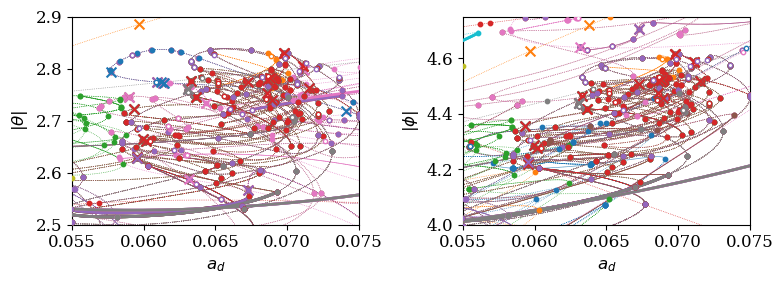

In [25]:
N=16
filebase='data/pendula2/'
num_chimeras=np.count_nonzero([st.isdigit() for st in os.listdir(filebase)])
plt.subplots(1,2,figsize=(8,3))

for i in range(num_chimeras):
    try:
        numbr=int(os.popen('ls %s%i/total*.dat | wc -l 2> /dev/null' %(filebase,i),'r',1).readline())
        if numbr==0:
            raise Exception()

        for k in range(numbr):
            br=np.loadtxt('%s%i/total%i.dat'%(filebase,i,k+1))[:]
            if len(br)>5:
                stableinds=np.array(np.where(br[:,11]==6*N+2)[0])
                stablebranches=[]
                jumps=np.where(np.diff(stableinds)>2)[0]
                cuts=np.zeros(2+2*len(jumps),dtype=int)
                cuts[0]=0
                cuts[-1]=-1
                cuts[1:-1:2]=jumps
                cuts[2:-1:2]=jumps+1
                for j in range(0,len(cuts),2):
                    stablebranches=stablebranches+[stableinds[cuts[j]:cuts[j+1]]]

                jumps=1+np.array(np.where(np.diff(br[:,-1])!=0)[0])
                jumps=jumps[jumps+1<len(br)]
                jumps=jumps[jumps-1<len(br)]
                bpinds=np.array(np.where(np.sign(br[jumps+1,6]**2+br[jumps+1,7]**2-1)/np.sign(br[jumps-1,6]**2+br[jumps-1,7]**2-1)>0)[0],dtype=int)
                sbpsinds=np.array(np.where(np.sign(br[jumps+1,6]-1)/np.sign(br[jumps-1,6]-1)<0)[0],dtype=int)
                sbpsinds=sbpsinds[np.intersect1d(np.intersect1d(np.where(np.abs(br[jumps[sbpsinds],6]-1)<1e-1)[0],np.where(np.abs(br[jumps[sbpsinds]+1,6]-1)<1e-1)[0]),np.where(np.abs(br[jumps[sbpsinds]-1,6]-1)<1e-1)[0])]
                trinds=np.array(np.where(np.sign(br[jumps+1,6]**2+br[jumps+1,7]**2-1)/np.sign(br[jumps-1,6]**2+br[jumps-1,7]**2-1)<0)[0],dtype=int)
                trinds=trinds[np.intersect1d(np.intersect1d(np.where(np.abs(br[jumps[trinds],6]**2+br[jumps[trinds],7]**2-1)<1e-1)[0],np.where(np.abs(br[jumps[trinds]+1,6]**2+br[jumps[trinds]+1,7]**2-1)<1e-1)[0]),np.where(np.abs(br[jumps[trinds]-1,6]**2+br[jumps[trinds]-1,7]**2-1)<1e-1)[0])]
                trinds=np.setdiff1d(trinds,sbpsinds)
                bpinds=np.setdiff1d(bpinds,sbpsinds)
                bps=br[jumps[bpinds]]                
                sbps=br[jumps[sbpsinds]]
                trs=br[jumps[trinds]]            

                plt.subplot(1,2,1)
                plt.plot(br[:,0],br[:,3],ls=':',c=colors[(i)%len(colors)],lw=0.5,label=k,zorder=1)
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,3],c=colors[(i)%len(colors)],lw=2,zorder=3)
                for bp in bps:
                    plt.scatter(bp[0],bp[3],edgecolor=colors[(i)%len(colors)],facecolor=colors[(i)%len(colors)],marker='o',s=10,zorder=4)
                for tr in trs:
                    plt.scatter(tr[0],tr[3],edgecolor=colors[(i)%len(colors)],facecolor='white',marker='o',s=10,zorder=5)
                for sbp in sbps:
                    plt.scatter(sbp[0],sbp[3],c=colors[(i)%len(colors)],marker='x',s=50,zorder=5)
                    
                plt.ylabel(r'$|\theta|$')
                plt.xlabel(r'$a_d$')
                plt.ylim(ylims3)
                plt.xlim(xlims2)


                plt.subplot(1,2,2)
                plt.plot(br[:,0],br[:,4],ls=':',c=colors[(i)%len(colors)],lw=0.5,label=k,zorder=1)
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,4],c=colors[(i)%len(colors)],lw=2,zorder=3)
                for bp in bps:
                    plt.scatter(bp[0],bp[4],edgecolor=colors[(i)%len(colors)],facecolor=colors[(i)%len(colors)],marker='o',s=10,zorder=4)
                for tr in trs:
                    plt.scatter(tr[0],tr[4],edgecolor=colors[(i)%len(colors)],facecolor='white',marker='o',s=10,zorder=5)
                for sbp in sbps:
                    plt.scatter(sbp[0],sbp[4],c=colors[(i)%len(colors)],marker='x',s=50,zorder=5)

                plt.ylabel(r'$|\phi|$')
                plt.xlabel(r'$a_d$')
                plt.ylim(ylims4)
                plt.xlim(xlims2)



    except Exception as e:
        print(e)
        pass
    
plt.tight_layout()
plt.savefig(filebase+'penduladiagram3.pdf')
plt.show()
